<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week2_Intervention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)




In [3]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management
install.packages("its.analysis") ## additional ITSA package in R

library(TSA)
library(fpp2)
library(tidyverse)
library(its.analysis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Interrupted Time Series Analysis (ITSA)

*   Also known as "intervention analysis". (TSAAR)
*   It is a system of methods in time series analysis to extract insights on the nature and impact of interventions in the behavior of the phenomenon as observed from the time series data. (TSAAR)
* It is also a field in causal inference in which the causal effect of interventions, such as policies, are analyzed from the shifts in the behavior observed from time series data. (ITSAOUP)

## Interventions

* events in the history of the phenomenon that leads to changes in behavior that are observable in the time series data.
* These changes may be abrupt or gradual, and their impact may be permanent or temporary (ITSASP)
* Examples: policy changes, new laws, changes in government/management, reforms, change in practices, mergers and acquisitions, weather events, sudden events.



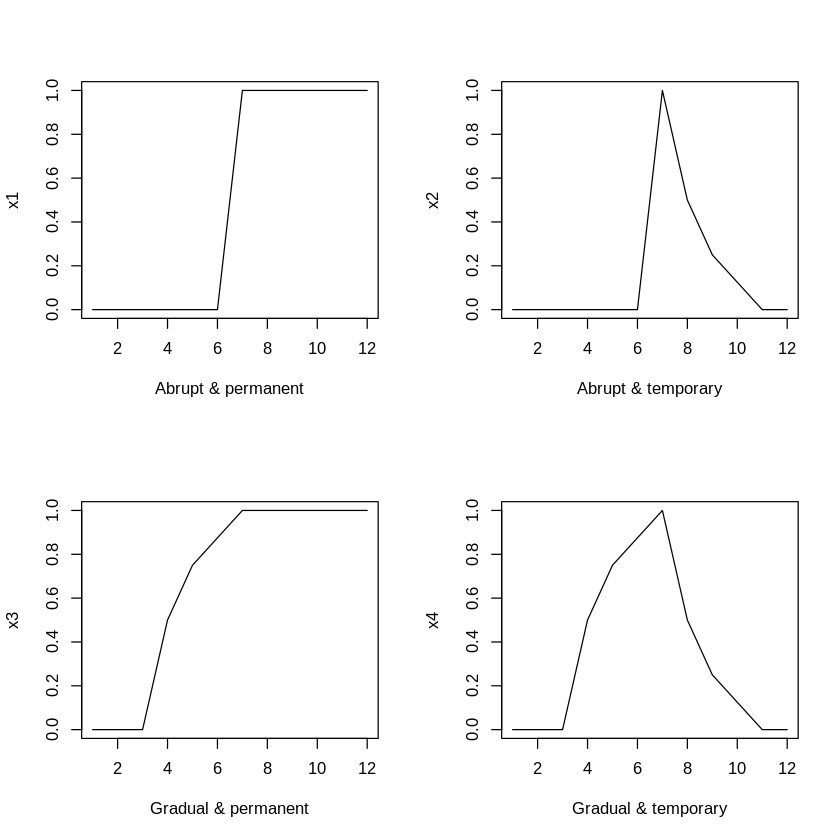

In [ ]:
## Examples of Observed Impact of Interventions in Time Series Data

par(mfrow =c(2,2)) ## displays graphs in 2 rows and 2 columns

x1 <- c(0,0,0,0,0,0,1,1,1,1,1,1) ## Abrupt & permanent
x2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0) ## Abrupt & temporary
x3 <- c(0,0,0,0.5, 0.75, 0.875, 1,1,1,1,1,1) ## Gradual & permanent
x4 <- c( 0,0,0,0.5, 0.75, 0.875, 1, 0.5, 0.25, 0.125,0,0) ## Gradual & temporary

plot(x1, xlab = "Abrupt & permanent", type = "l")
plot(x2, xlab = "Abrupt & temporary", type = "l")
plot(x3, xlab = "Gradual & permanent", type = "l")
plot(x4, xlab = "Gradual & temporary", type = "l")

Comment: The gradual-temporary combination is rarely used in practice, though one can create a model that simulates the occurrence, as shown here, and can fit it with data once we have discussed the basics of ITSA. I will leave that to the exploration of the reader.

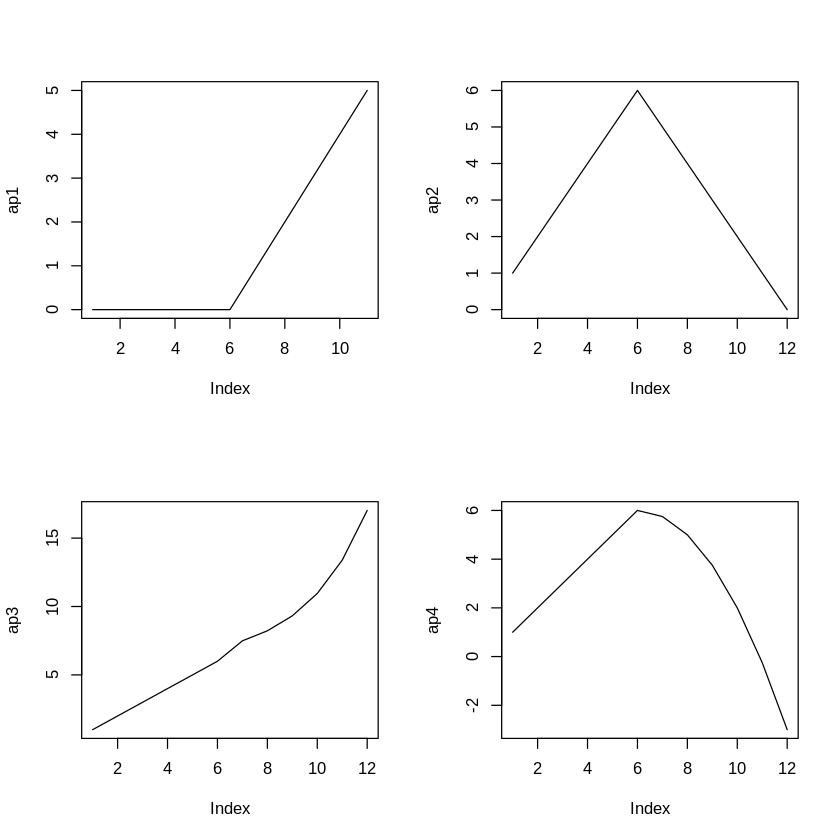

In [ ]:
## Other (Non-exhaustive) Examples of Abrupt & Permanent Changes

par(mfrow =c(2,2))

ap1 <- c(0,0,0,0,0,0,1,2,3,4,5)
ap2 <- c(1,2,3,4,5,6,5,4,3,2,1,0)
ap3 <- c(1,2,3,4,5, 6, 6+exp(0.4), 6+exp(0.8), 6+exp(1.2), 6+exp(1.6), 6+exp(2), 6+exp(2.4) )
ap4 <- c(1,2,3,4,5, 6, 6-(0.5)^2, 6-(1)^2, 6-(1.5)^2, 6-(2)^2, 6-(2.5)^2, 6-(3)^2 )

plot(ap1, type = "l")
plot(ap2, type = "l")
plot(ap3, type = "l")
plot(ap4, type = "l")

Comment: There are many manifestations of the abrupt-permanent intervention, especially in practice.

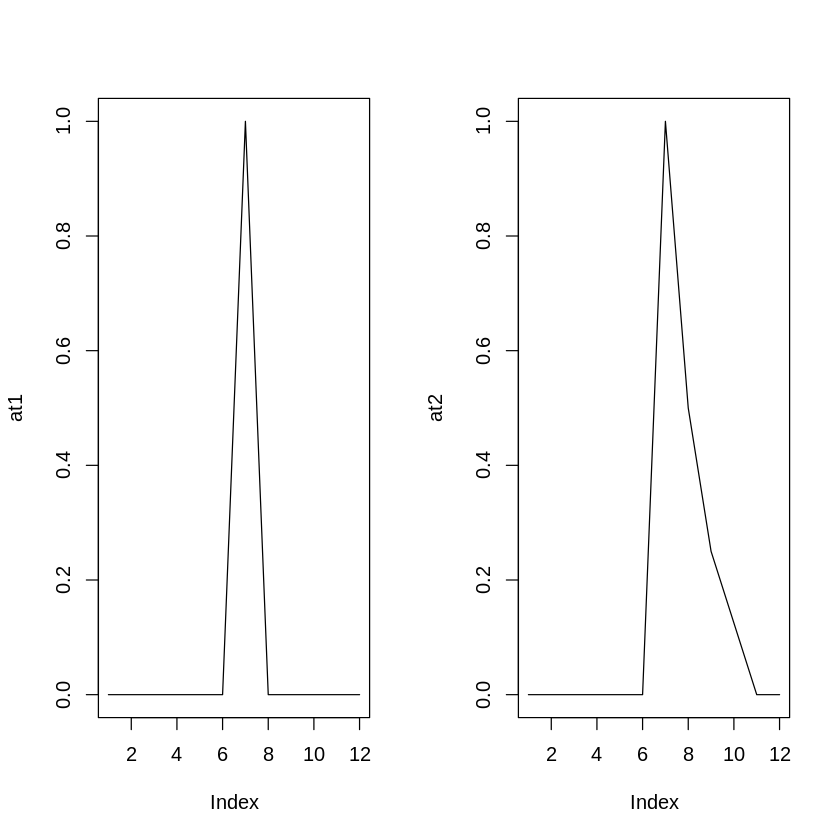

In [ ]:
## Two Types of Abrupt-Temporary Changes

par(mfrow = c(1,2))

at1 <- c(0,0,0,0,0,0,1,0,0,0,0,0)
at2 <- c(0,0,0,0,0,0,1, 0.5, 0.25, 0.125,0,0)

plot(at1, type="l")
plot(at2, type="l")



Comment: The occurrence of the first type as seen above may be called an additive outlier effect and is only isolated for 1 point in time and has no effect in the succeeding progression of the time series data.

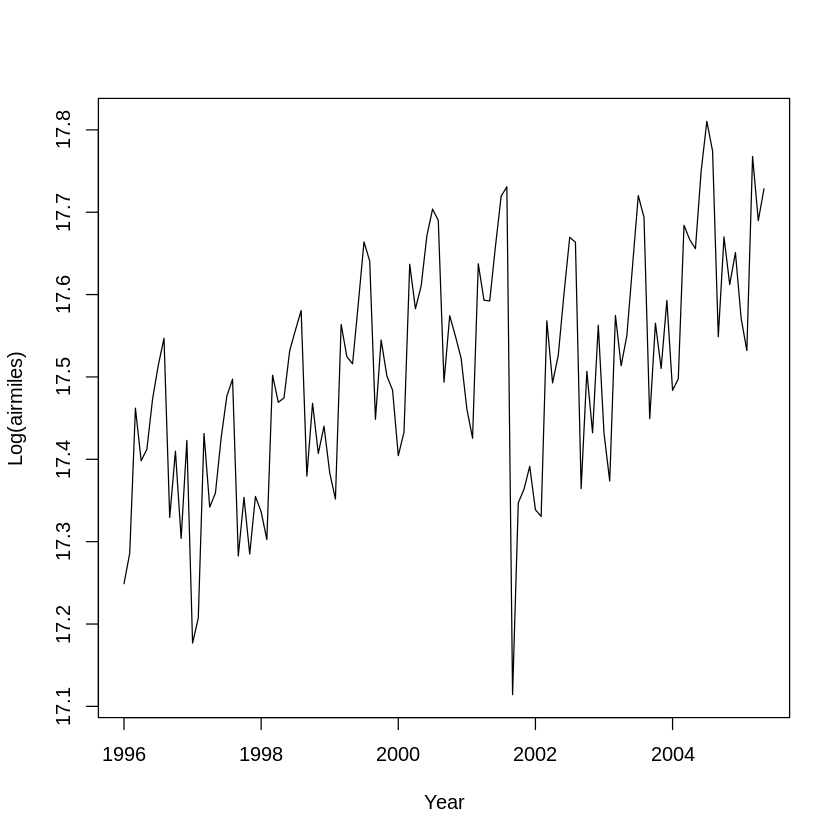

In [ ]:
## Data Example, Monthly U.S. Airline Miles: January 1996 through May 2005 (TSAAR)

data(airmiles)
plot(log(airmiles),ylab='Log(airmiles)',xlab='Year')

Comment: there is a noticeable drop  in air miles flown by tourists aligning with the occurrence of the Sept 11, 2001 terrorism attacks on the US. It is seen that there is some observable change in the time series but the nature of the shift, whether abrupt or gradual, with prmanent or temporary change, is still to be answered.

## The Simple Intervention Model (ITSAOUP, TSAAR)

$$ Y_t = L (ϵ_t) + X(I_t)$$

where

$Y_t = $ time series data,

$ L (ϵ_t) =$ time series model specification independent of the intervention effect and typically contains the error terms, e.g., ARIMA

$X(I_t) = $ the intervention impact/effect term which contains the shift in the behavior of the time series, e.g., different ARIMA dynamics or a new term in the model.

Suppose that an intervention event happened at time $t = T^*$.

The subset of the time series data $\{ Y_t , t < T^* \}$ is called the *pre-intervention data*. The data subset may be used to specify the model of the $L(\epsilon_t)$.


### Intervention Variable Terms

#### Step Function

The step function at time $t$ with the intervention event starting at time period $T^*$ is defined as $S_t^{(T^*)}$ with

$$ S_t^{(T^*)} = 1, if \quad t \ge T^*  $$
$$ S_t^{(T^*)} = 0, otherwise  $$

#### Pulse Function

The pulse function at time $t$ with the intervention event starting at time $T^*$ is defined as $P_t^{(T^*)}$ with

$$ P_t^{(T^*)} = 1, if \quad t = T^*  $$
$$ P_t^{(T^*)} = 0, otherwise  $$

So, it is simply a spike function. Alternatively, one can define $P_t^{(T^*)}$ as

$$P_t^{(T^*)} = S_t^{(T^*)} - S_{t-1}^{(T^*)} = (1-B) S_t^{(T^*)}$$

And similarly,

$$S_t^{(T^*)} = \frac{1}{1-B}P_t^{(T^*)}$$

[1] 0 0 0 0 0 0 1 1 1 1 1 1

[1] NA  0  0  0  0  0  1  0  0  0  0  0

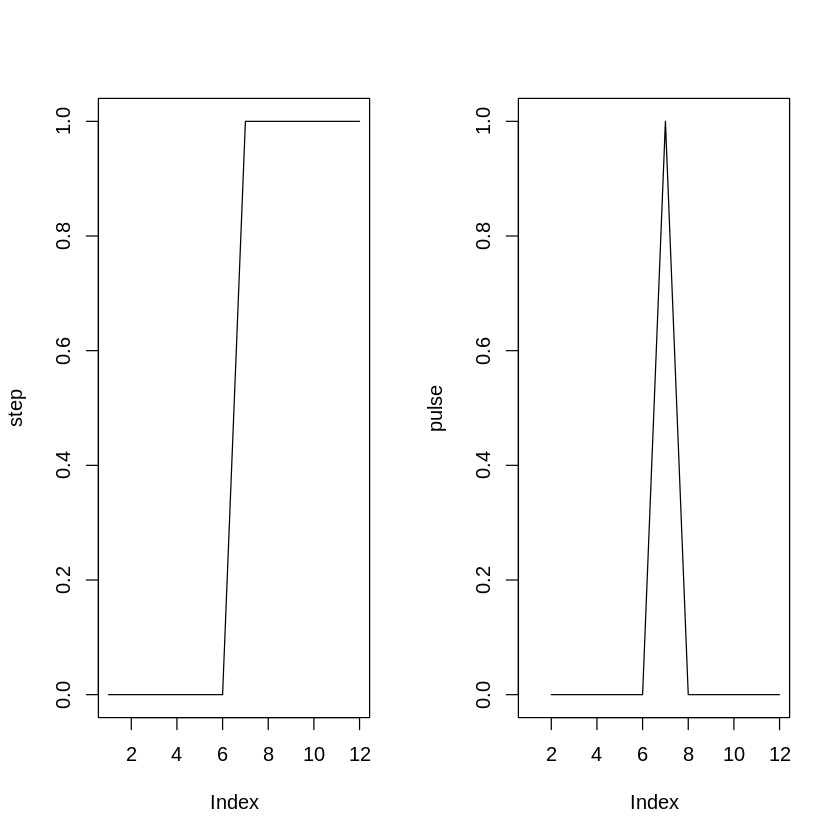

In [ ]:
## The Step and Pulse Functions

## Suppose the Intervention Event started at the
## 7th period in this data of 12 time series periods

step <- c(rep(0, times = 6), rep(1, times = 6))
pulse <- c( NA, diff(step) ) ## diff() does first-order adjacent differencing
## but diff forgets to place an NA in the beginning for general use. Technically,
## it should be 0 by definition of the pulse function.

## Show the time series
step
pulse

## Plot the Functions

par(mfrow = c(1,2))

plot(step, type = "l")
plot(pulse, type = "l")

### Modeling $X(I_t)$

We would often model the impact of interventions with $X()$ specified as a *transfer function*. (ITSAOUP, TSAAR)

Transfer functions are time series model specifications applied on the independent variables, e.g. covariates, treatment/policy variables, when used for time series regression.

Depending on the structure of $X()$, certain types of intervention effects may be observed. In terms of model term, let me use $m_t = $ model structure of $X(I_t)$ (TSAAR), i.e.,

$$Y_t =L(\epsilon_t) + m_t$$

Examples (TSAAR):

* $m_t = \omega S_t^{T^*}$ is an abrupt-permanent change with constant impact $\omega$
* $m_t = \omega S_{t-d}^{T^*}$ is an abrupt-permanent change with intervention event in time $T^*$ but its impact has a delay $d$
* $m_t = \delta m_{t-1} + \omega S_t^{T^*} ⇒ m_t = \frac{\omega}{1-\delta B} S_t^{T^*} $ gives a gradual-permanent change with exponential transition parameter $\delta$.
* $m_t = \omega P_t^{T^*}$ is a abrupt-temporary change that is an additive outlier
* $m_t = \delta m_{t-1} + \omega P_t^{T^*} ⇒ m_t = \frac{\omega}{1-\delta B} P_t^{T^*} $ is a abrupt-temporary change with exponential decay $\delta$. As $\delta \rightarrow 1$, $m_t = \omega S_t^{T^*} $

Let's show some example models with illustrations (TSAAR).

For some examples with step model functions, we will show the following with all having a delay of lag 1:

1. $m_t =  \omega B S_t^{T^*} =  \omega S_{t-1}^{T^*} $  , an abrupt and permanent shift in level/mean,

2. $m_t =  \omega \frac{B}{1 - \delta  B} S_t^{T^*}$, a gradual and permanent shift in level/mean, which is equivalent to $m_t = \delta m_{t-1} + \omega S_{t-1}^{T^*}$

3. $m_t =  \omega \frac{B}{1 -   B} S_t^{T^*}$, an abrupt and permanent change in slope $= \omega$, which is equivalent to $m_t =  m_{t-1} + \omega S_{t-1}^{T^*}$

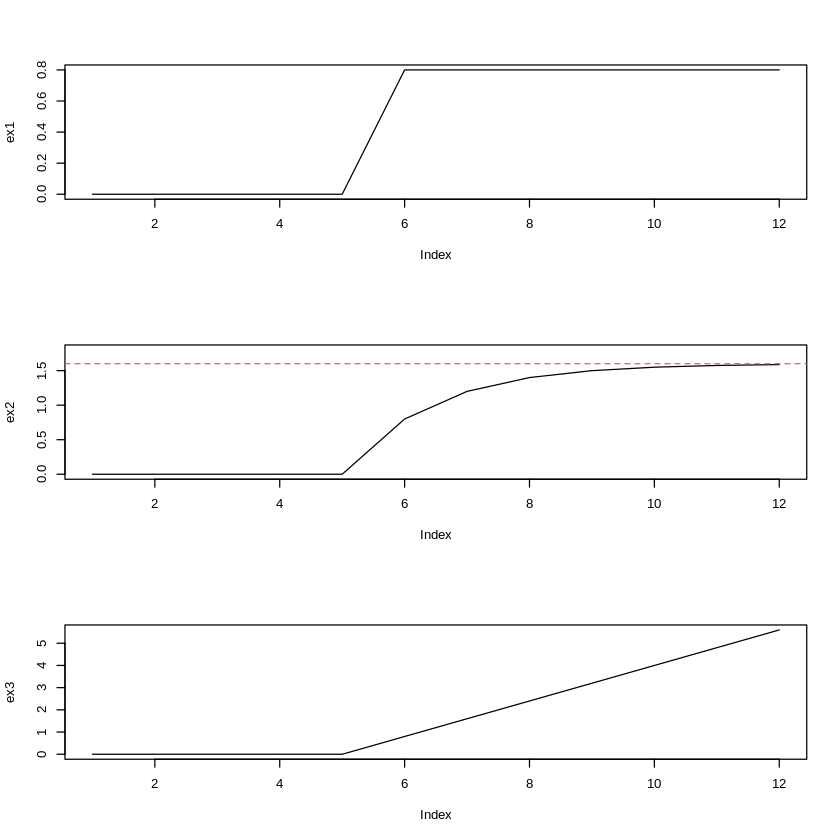

In [ ]:
## Examples of some intervention impacts depending on intervention model

par(mfrow = c(3,1))
# For the sake of example,
w <-  0.8
delta <- 0.5
T_int <- 5 # = intervention event
delay <- 1
n <- 12 # total periods

# 1. w x B x S_t^{T^*} , a simple abrupt and permanent shift in level with 1 period delay.

S_t <- c(rep(0,times = T_int - 1), rep(1,times = n - T_int + 1)) ## Original S_t
BS_t <- c(0, lag(S_t, delay)[-(1:delay)] ) ## lagged S_t: We remove the NA at the beginning and replace them with 0.
ex1 <- w*BS_t

plot(ex1, type = "l")

# 2. w x B / (1 - delta x B) x S_t^{T^*} , a gradual and permanent shift to a new level with 1 period delay.
# equivalent to m_t = delta x m_{t-1} + w x B x S_t

ex2 <- c() ## empty vessel

ex2[1] <- 0 ## starting value for the loop

for (i in 2:n) {
  ex2[i] <- delta * ex2[i-1] + ex1[i]
}

plot(ex2, type = "l", ylim=c(0, 1.8))
abline(h =w/(1-delta), col = 2, lty = 2) ## highlights the convergence to w/(1-delta) = 1.6

# 3. w x B / (1 - B) x S_t^{T^*} , an abrupt and permanent shift to a new slope = w with 1 period delay.
# equivalent to m_t = m_{t-1} + w x B x S_t

ex3 <- c() ## empty vessel

ex3[1] <- 0 ## starting value for the loop

for (i in 2:n) {
  ex3[i] <- ex3[i-1] + ex1[i]
}

plot(ex3, type = "l")

For some example pulse functions used in intervention models with 1 period delay of impact (TSAAR):

1. $m_t = \frac{\omega B}{1-\delta B}P_t^{(T^*)}$, an abrupt and temporary change with decay $\delta$ such that $|\delta| < 1$, which is equivalent to $m_t = \delta m_{t-1} + \omega P_{t-1}^{T^*}$

2. $m_t = \left[ \frac{\omega_1 B}{1-\delta B} + \frac{\omega_2 B}{1 - B} \right] P_t^{(T^*)}$ a type of an abrupt and permanent change to a different level/mean, equivalent to the equation $m_t = (1 + \delta ) m_{t-1} - \delta m_{t-2} + (\omega_1 + \omega_2 ) P_{t-1}^{T^*} - (\omega_1 + \omega_2 \delta ) P_{t-2}^{T^*}$. Alternatively, it can also be written as $m_t = \delta  m_{t-1} + \omega_1 P_{t-1}^{T^*} + \omega_2  S_{t-1}^{T^*} - \omega_2 \delta  S_{t-2}^{T^*}$

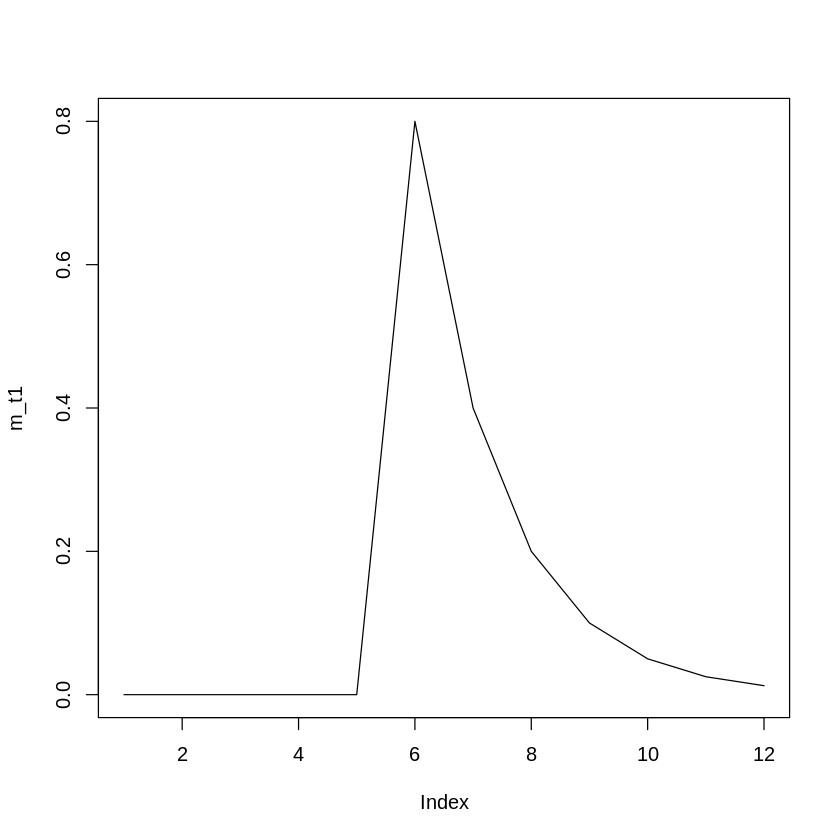

In [ ]:
## Example 1 for pulse function in intervention models

omega <- 0.8
delta <- 0.5
T_int <- 5
## delay = 1
n <- 12

## Setup the pulse function
P_t <- rep(0, times = n)
P_t[T_int] <- 1

## Lagged P
BP_t <- c(0, lag(P_t)[-1]) ## deleting the NA and substituting it with 0.

## Setup the m term
m_t1 <- c() ## empty container
m_t1[1] <- 0 ## initial value as zero

## Producing the intervention effect

for (i in 2:n) {
  m_t1[i] <- delta * m_t1[i-1] + omega*BP_t[i]
}

plot(m_t1, type = "l")

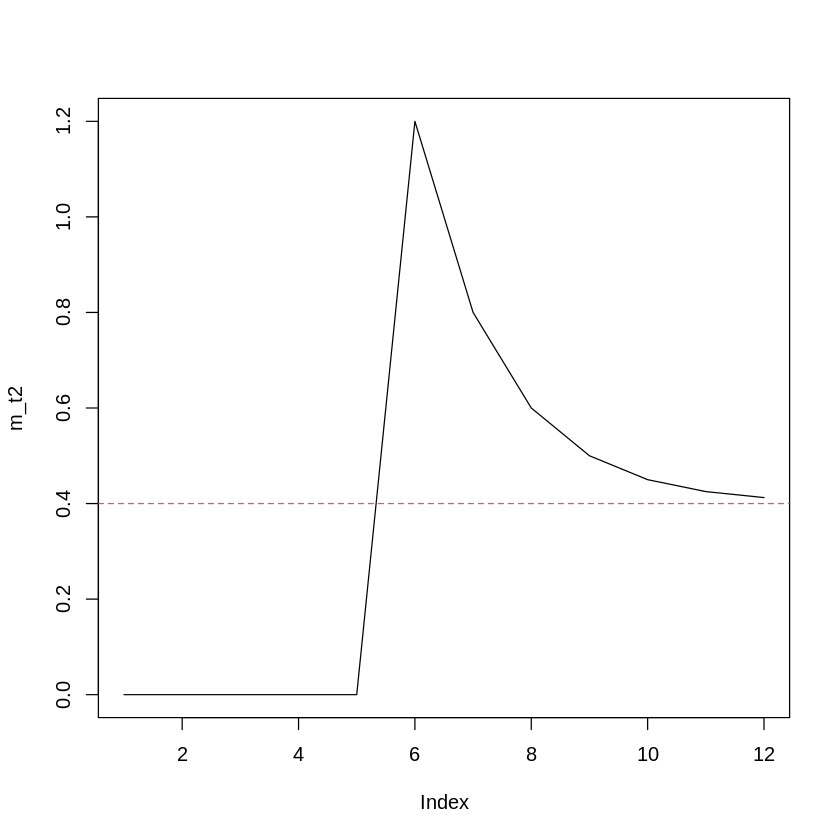

In [ ]:
## Example 2 for pulse function in intervention models

omega1 <- 0.8
omega2 <- 0.4
delta <- 0.5
T_int <- 5
## delay = 1
n <- 12

## Setup the pulse function
P_t <- rep(0, times = n)
P_t[T_int] <- 1

## Lagged P
BP_t <- c(0, lag(P_t)[-1]) ## deleting the NA and substituting it with 0.
B2P_t <- c(0, lag(BP_t)[-1]) ## deleting the NA and substituting it with 0.

## Setup the m term
m_t2 <- c() ## empty container
m_t2[1] <- 0 ## initial value as zero
m_t2[2] <- 0 ## initial value as zero

## Producing the intervention effect

for (i in 3:n) {
  m_t2[i] <- (1 + delta) * m_t2[i-1] - delta * m_t2[i-2] + (omega1 + omega2)*BP_t[i] - (omega1 + omega2*delta)*B2P_t[i]
}

plot(m_t2, type = "l")
abline(h = omega2, lty = 2, col = 2)

Comment: I did not do example (c) in TSAAR, p. 254, as I will leave it to you.

## Example: US Monthly Air Passenger Miles (TSAAR)

Note: We will do some steps differently from TSAAR but the key here is the procedure that needs to be done.

Series: pre_int 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.5006  -0.5709
s.e.   0.1091   0.2298

sigma^2 = 0.001258:  log likelihood = 105.82
AIC=-205.64   AICc=-205.17   BIC=-199.61

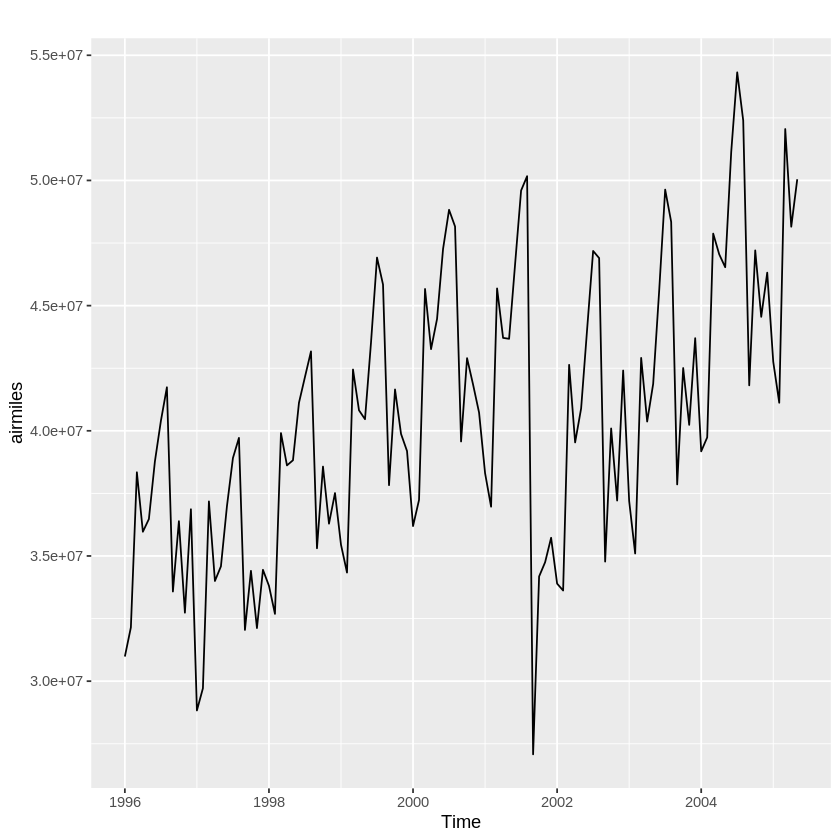


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 8.3926, df = 12, p-value = 0.7537

Model df: 2.   Total lags used: 14




	Shapiro-Wilk normality test

data:  residuals(auto.arima(pre_int))
W = 0.77514, p-value = 7.855e-09


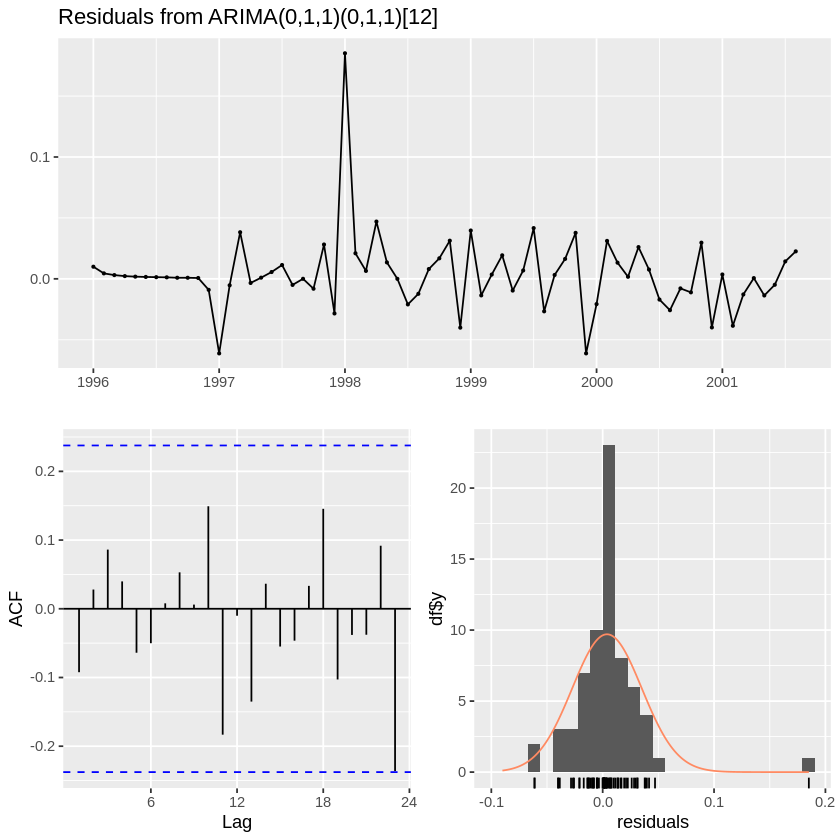

In [ ]:
## Estimation Steps:

## 0. Identify when interventions occurred. This is done by research.
##    Some do search algorithms to determine when are starting periods of shifts in time series.
##    An example algorithm is a rolling search algorithm using the Chow Breakpoint Test (Chow 1960)
##    through the periods of the time series

## 1. From the preintervention data (e.g., before Sept 11, 2001 for the US Miles data), determine the appropriate
##    ARIMA model.
##  > For my case, I will be using the auto.arima() function in the forecast package to determine the best model based on
##    the corrected Akaike information criterion (Hyndman & Khandakar 2008)

data(airmiles) ## attaching the data into the R backend

autoplot(airmiles) ## plotting time series data

pre_int <- window(log(airmiles), end = c(2001,8))
## airmiles is a ts() time series data object, freq = 12 for monthly data and data periods in c(year, month) form.
## window() makes a subset of the data, in this case ending up to August 2001 (2001-08)

auto.arima(pre_int)
## The selected model is ARIMA(0,1,1)(0,1,1)[12] with zero drift (i.e., intercept), which agrees with TSAAR

checkresiduals(auto.arima(pre_int))
shapiro.test(residuals(auto.arima(pre_int)))
## some residual diagnostics and check for normal residuals.
## In my assessment, it seems there is an additive outlier in Jan 1998.
## In TSAAR, there are outliers in Dec 1996, Jan 1997, and Dec 2002.
## We will take note of my and TSAAR's assessment as additional additive terms for the model including the
## selected ARIMA(0,1,1)(0,1,1)[12]

From the assessment by TSAAR of the In this case, the model to be fit with the full dataset of $Y_t = log(Airmiles)$ will be of the form

$$ Y_t = L(\epsilon_t) + m_t $$
$$ L(\epsilon_t) = \frac{ (1 + \theta B) ( 1 + \Theta B^{12} )}{(1-B) (1-B^{12})} \epsilon_t + \beta_1 * Dec96 + \beta_2 Jan97 + \beta_3 Jan98 + \beta_4 Dec02$$
$$m_t = \omega_0 P_t^{T^*} + \frac{\omega_1}{1-\omega_2 B} P_t^{T^*}  $$

The $L(\epsilon_t)$ is simply based on the assessment on the preintervention data and the additive outliers that were noted.

The $m_t$ components assumes that:
* the log of airmiles will have an abrupt impact at Sept 11 equal to $\omega_0 + \omega_1$
* the exponential decay/transition will be at the rate of $\omega_2$ but in the scale of $\omega_1$, i.e. $\omega_1 \times \omega_2^k$ for k months

This is what we will use for the model.

But how about you, how would you do it? Well, you have to try different possible intervention models. I suggest using the abrupt/gradual + permanent/temporary rubric to make your model assessment.


Call:
arimax(x = log(airmiles), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12), xreg = data.frame(Dec96 = 1 * (seq(airmiles) == 12), Jan97 = 1 * 
    (seq(airmiles) == 13), Jan98 = 1 * (seq(airmiles) == 25), Dec02 = 1 * (seq(airmiles) == 
    84)), method = "ML", xtransf = data.frame(I911 = 1 * (seq(airmiles) == 69), 
    I911 = 1 * (seq(airmiles) == 69)), transfer = list(c(0, 0), c(1, 0)))

Coefficients:
          ma1     sma1   Dec96    Jan97   Jan98   Dec02  I911-MA0  I911.1-AR1
      -0.3787  -0.6147  0.0978  -0.0542  0.0516  0.0796   -0.0912      0.8065
s.e.   0.0872   0.1150  0.0221   0.0221  0.0202  0.0193    0.0439      0.0912
      I911.1-MA0
          -0.274
s.e.       0.042

sigma^2 estimated as 0.0006366:  log likelihood = 223.15,  aic = -428.31

Training set error measures:
                      ME       RMSE        MAE         MPE      MAPE     MASE
Training set 0.001542652 0.02445805 0.01801902 0.008589302 0.1030503 0.205733
                  


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 28.116, df = 21, p-value = 0.1369

Model df: 2.   Total lags used: 23




	Shapiro-Wilk normality test

data:  residuals(air.m1)
W = 0.98051, p-value = 0.09831


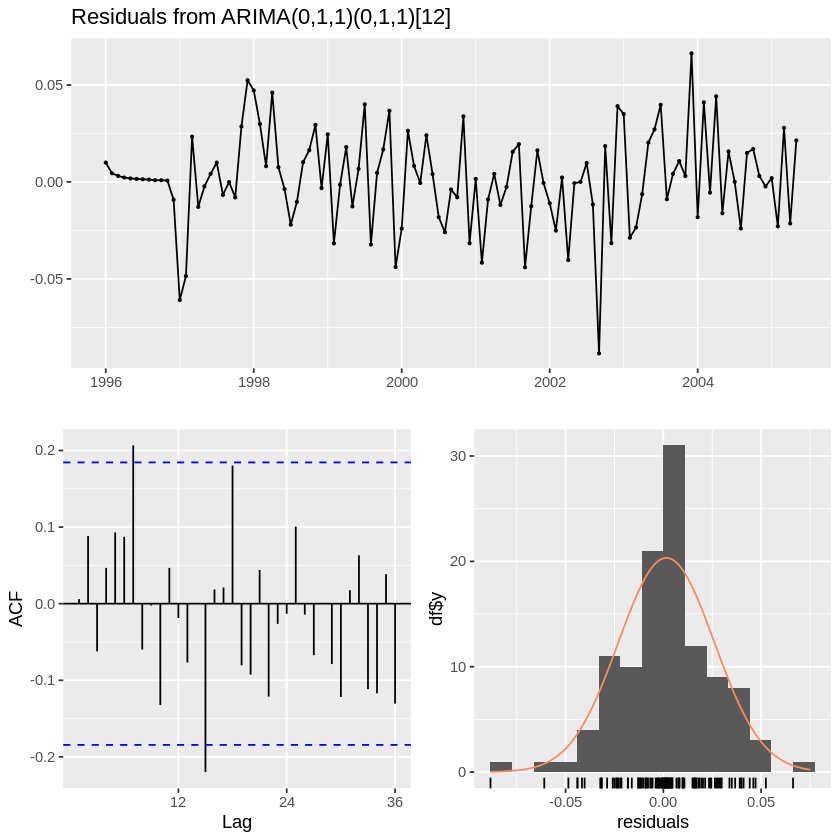

In [ ]:
## 2. Setup the Model and Estimate

air.m1 <- arimax(
                 log(airmiles),   ## data to be fit
                 order=c(0,1,1),  ## Nonseasonal ARIMA (p,d,q) order
                 seasonal=list(
                               order=c(0,1,1), ## Seasonal ARIMA order
                               period=12       ## Number of seasons in a year
                               ),
                 xtransf=data.frame(
                                    I911=1*(seq(airmiles)==69), ## The first pulse function for \omega_0
                                    I911=1*(seq(airmiles)==69)  ## the second pulse function for \omega_1 & \omega2
                                    ),
                 transfer=list(
                               c(0,0), ## The ARMA(p,q) order of the first pulse function for \omega_0
                               c(1,0)  ## the ARMA(p,q) order of the second pulse function for \omega_1 & \omega2
                               ),
                 xreg=data.frame(
                                 Dec96=1*(seq(airmiles)==12), ## additive outlier for Dec 96
                                 Jan97=1*(seq(airmiles)==13), ## additive outlier for Jan 97
                                 Jan98=1*(seq(airmiles)==25), ## additive outlier for Jan 98
                                 Dec02=1*(seq(airmiles)==84) ## additive outlier for Dec 02
                                 ),
                 method='ML'  ## Estimation algorithm  is Maximum Likelihood assuming normal errors.
                 )
summary(air.m1) ## Model Summary

checkresiduals(air.m1) ## Residual Diagnostics
shapiro.test(residuals(air.m1)) ## Residual Normality Test

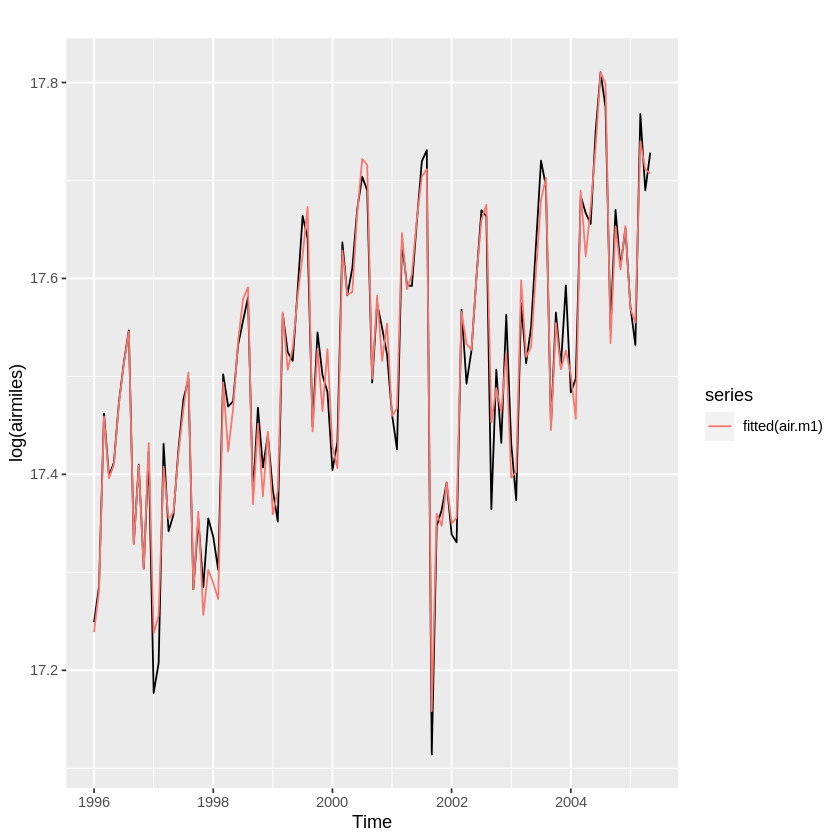

In [ ]:
## Plotting the fitted values with the observed log(airmiles)

autoplot(log(airmiles)) +
  autolayer(fitted(air.m1))

We ended up with a better model than TSAAR as we have low $\hat{\sigma}^2$, higher likelihood, and lower AIC, all indicative of better model fit. The only difference is that we took note of the Jan 1998 additive outlier.

The residual diagnostics indicate no significant autocorrelation of residuals as seen in the Ljung-Box white noise test though some spikes are seen in the ACF but let us be content with the test.

The Shapiro-Wilk test indicates safety in inferring normal residuals which can reflect to appropriate normality assumption.

With respect to the parameters of interest,

* I911-MA0 estimate corresponds to $\omega_0$,

* I911.1-MA0 estimate corresponds to $\omega_1$, and

* I911.1-AR1 estimate corresponds to $\omega_2$,

From the result, we can say that:

* On Sept 2001, the log of airmiles is estimated to have dropped by $-0.091 -0.274 = -0.365$, equivalently a drop of $(1-\exp(-0.365))\times 100\% = 30.58\% $  
* The decay of the effect of Sept 2001 on air miles after $k$ months is estimated to be $\left[ 1 - \exp(-0.274 \times 0.8065^k) \right] \times 100\%$

In terms of a visualization of the effect of Sept 2001, the code and its output follows:

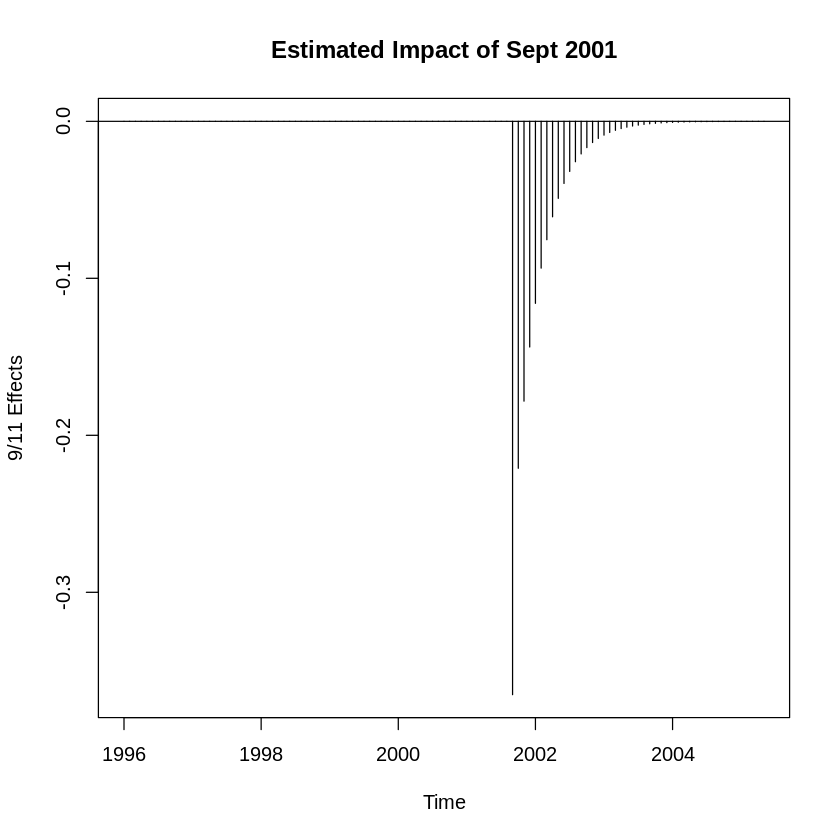

In [ ]:
Nine11p <- 1*(seq(airmiles)==69) ## Pulse Function for Sept 2001

plot(   ## general command for plots
  ts(   ## creating a ts object for time series data
    Nine11p*(-0.0912) ## Pulse Function times omega_0
    + stats::filter(  ## The Transfer Function filter specification
                    Nine11p, ## Pulse Function
                    filter=0.8065, ## omega_2
                    method='recursive', ## Iterative application which follows with the AR process
                    side=1)
                    *(-0.274), ## omega_1
   frequency=12, ## monthly data declaration for ts()
   start=1996), ## starting year, assumes first data is the 1st month, i.e., January
   ylab='9/11 Effects', ## Label for the y axis
   type='h', ## type of plot, which are a series of vertical lines
   main = "Estimated Impact of Sept 2001" ## title of plot
   )

abline(h=0) ## baseline

If we assume that at some point, the drop in air miles becomes negligible, say less than 1% from historical behavior, we can say that air miles may recovered after at least
$k = 15.37$ months, which around the end of 2003 or the start of 2004.



## its.analysis Package in R (ITSARP)

* the methodology devised for short time series data of about 15 to 45 time periods
* It uses a Type II Sum Squares ANCOVA Lagged Dependent Variable, variance-centric approach
* It assumes an AR(1) model for the dependent variable, typically used for short time series, but does not have an option to change this
* Many covariates can be added

In [ ]:
## Code Explainer

## for the itsa.model() function

itsa.model(
  data = NULL, ## data matrix that contains necessary variables
  time = NULL, ## time variable in "data", may be numeric or a date class object
  depvar = NULL, ## dependent variable, must be numeric and continuous
  interrupt_var = NULL, ## intervention variables, must be a factor
  covariates = NULL, ## covariate that affects the dependent variable but is not the variable of causal interest
  alpha = 0.05, ## level of significance for tests
  no.plots = FALSE, ## plots for ITSA
  bootstrap = TRUE, ## bootstrapping the F tests and estimates
  Reps = 1000, ## number of replicates for bootstrapping
  parr = "no", ## parallel computing, carryover from the "boot" package
  print = TRUE ## printing of model results
)

## for the itsa.posttest() function for showing post-estimation checks of the itsa.model() results

itsa.postest(
  model = NULL, ## model object resulting from itsa.model()
  no.plots = FALSE, ## presenting post-estimation plots
  alpha = 0.05, ## level of significance for tests
  bootstrap = TRUE, ## should be specified TRUE is itsa.model(bootstrap = TRUE)
  print = TRUE ## printing of model results
)

In [4]:
## Code Example

# time variable: year
year <- c(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)

# depv to for demo
depv <- c(8.22, 8.19, 8.23, 8.28, 8.32, 8.39, 8.02,7.92, 7.62, 7.23, 7.1, 7.11, 6.95, 7.36, 7.51, 7.78, 7.92, 7.81)

# intervention period, 2007-2014
interruption <- c(0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0)

# cov1: covariate that may have an impact on depv but is not of causal interest.
cov1 <- c(3.1, 3.3, 5.1, 5.2, 5.4, 4.5, 4.7, 4.9, 5.3,5.6, 5.8, 6.0, 4.8, 5.2, 4.5, 4.6, 5.1, 4.7)

# data frame combining all data
x <- as.data.frame(cbind(year, depv, interruption, cov1))

Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)
interrupt_var 0.3429  1  14.674 0.0018
lag_depvar    1.5140  1  64.798 <2e-16
Residuals     0.3271 14               
 
Bootstrapped F-values: 
 Lower CI Median F-value Upper CI
   4.8964          17.39   97.522

Result: Significant variation between time periods with chosen alpha (<0.05)


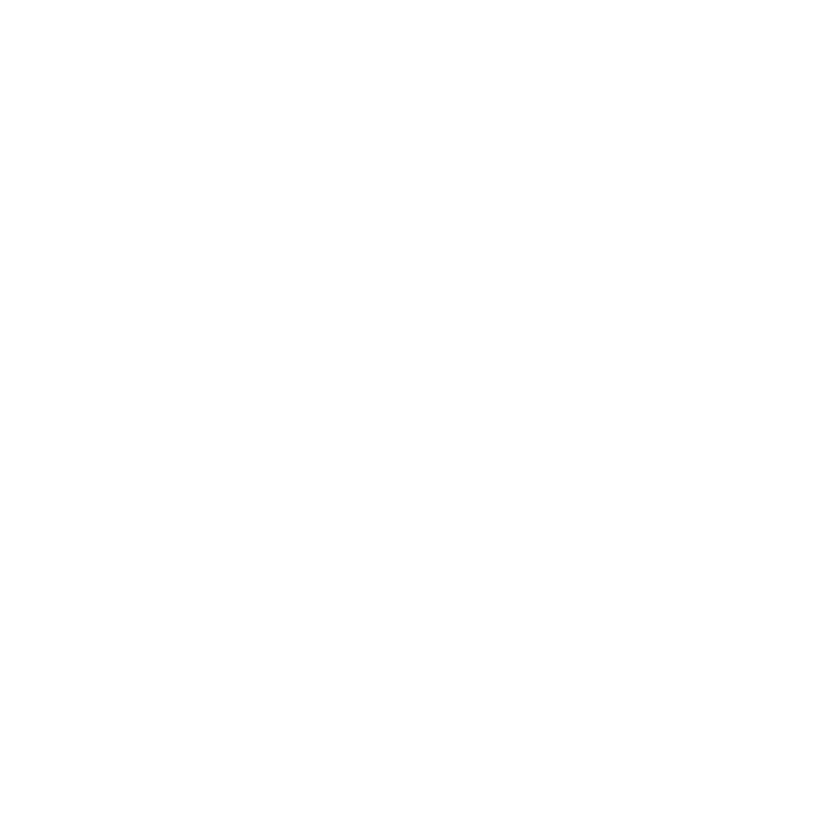

[[1]]
[1] "ITSA Model Fit"

$aov.result
Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)    
interrupt_var 0.3429  1  14.674 0.0018 ** 
lag_depvar    1.5140  1  64.798 <2e-16 ***
Residuals     0.3271 14                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$tukey.result
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = x$depvar ~ x$interrupt_var)

$`x$interrupt_var`
          diff        lwr        upr    p adj
1-0 -0.6340278 -0.9968813 -0.2711742 0.002035


$data
   depvar interrupt_var lag_depvar
2    8.19             0       8.22
3    8.23             0       8.19
4    8.28             0       8.23
5    8.32             0       8.28
6    8.39             0       8.32
7    8.02             1       8.39
8    7.92             1       8.02
9    7.62             1       7.92
10   7.23             1       7.62
11   7.10             1       7.23
12   7.11             1  

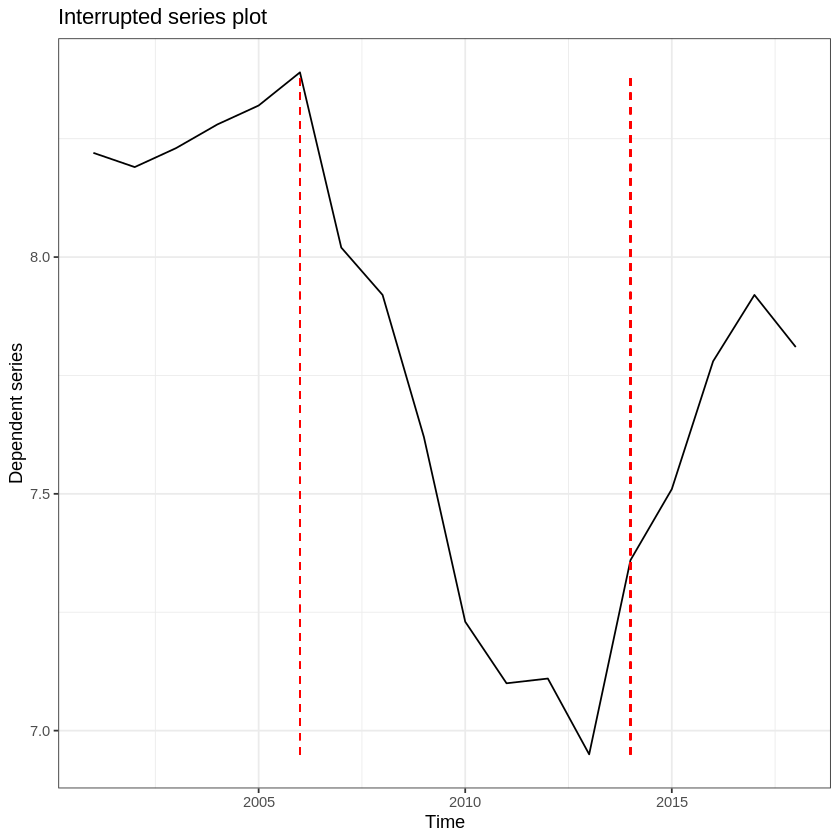

In [6]:
# First Sample Model:

mod1 <- itsa.model(data=x, time="year", depvar="depv", interrupt_var = "interruption",
alpha=0.05, bootstrap=TRUE, Reps = 250)

mod1

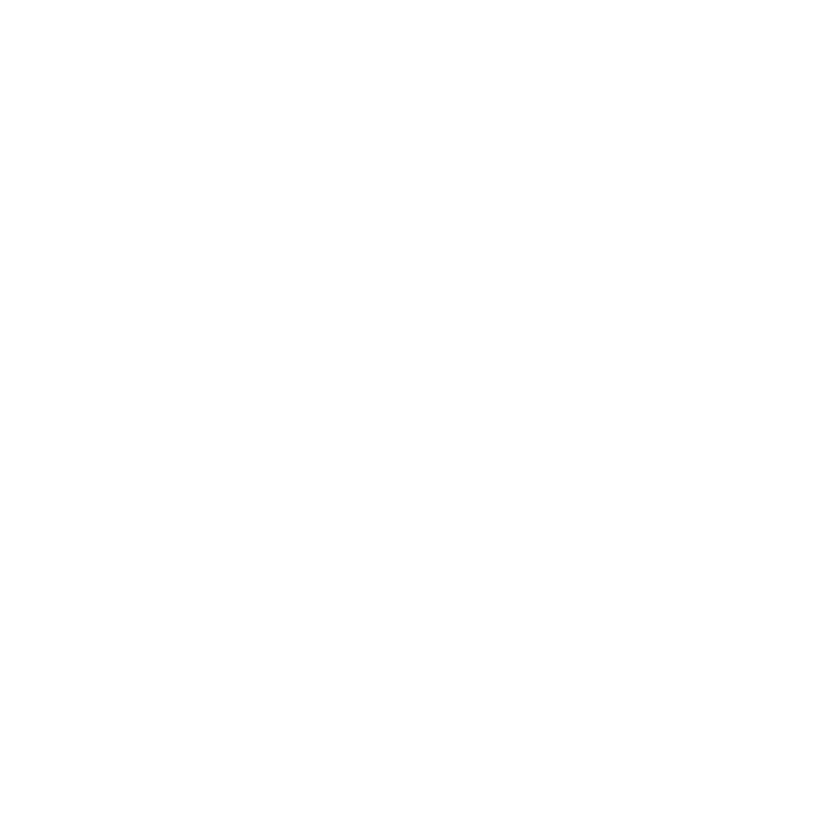

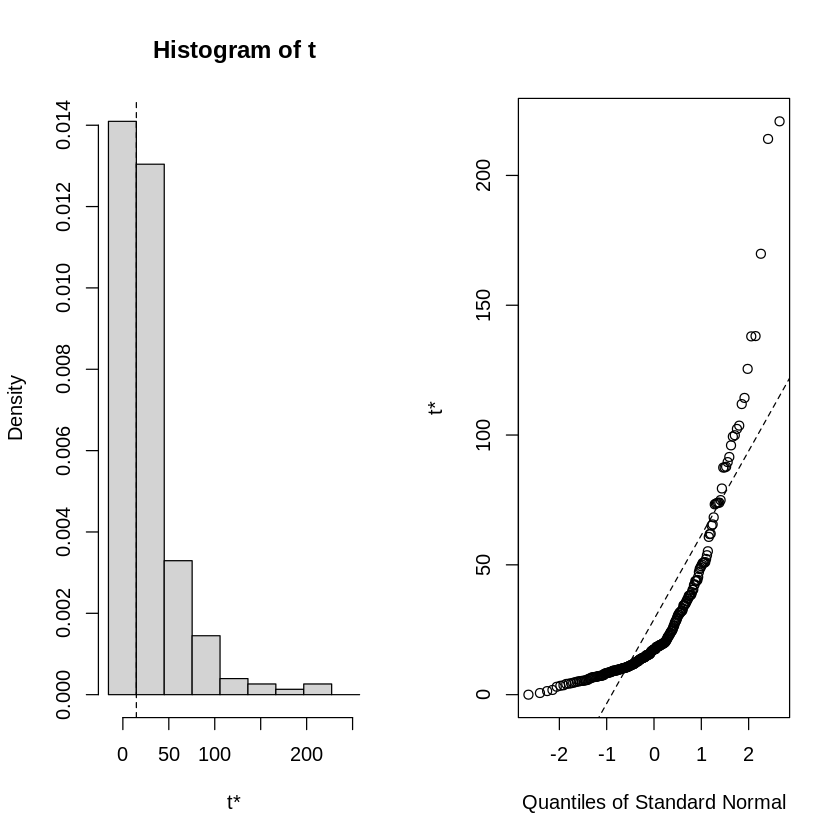

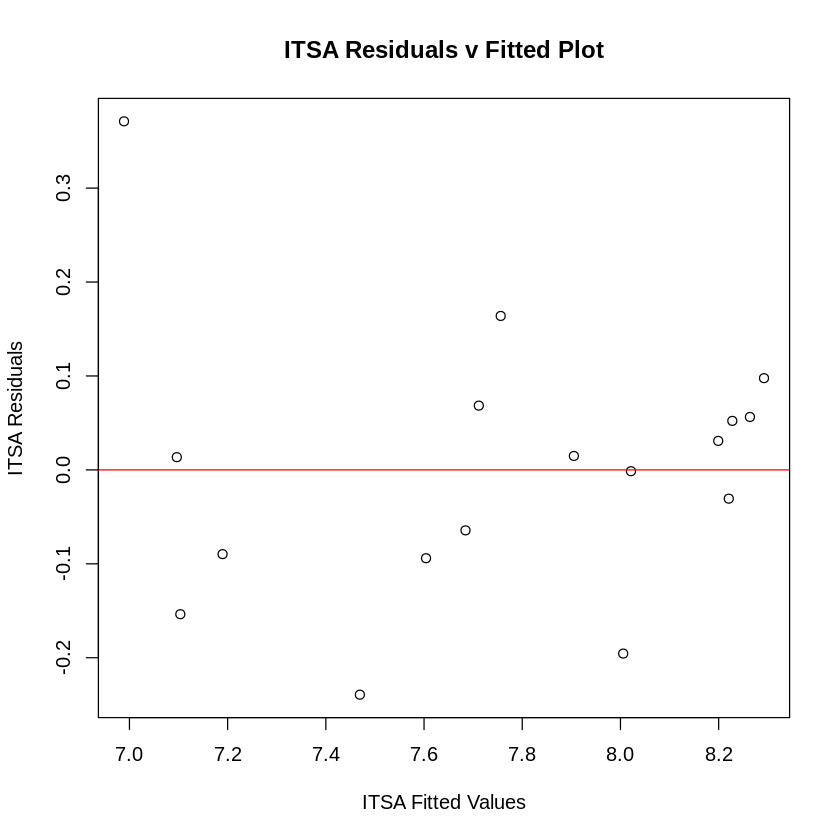

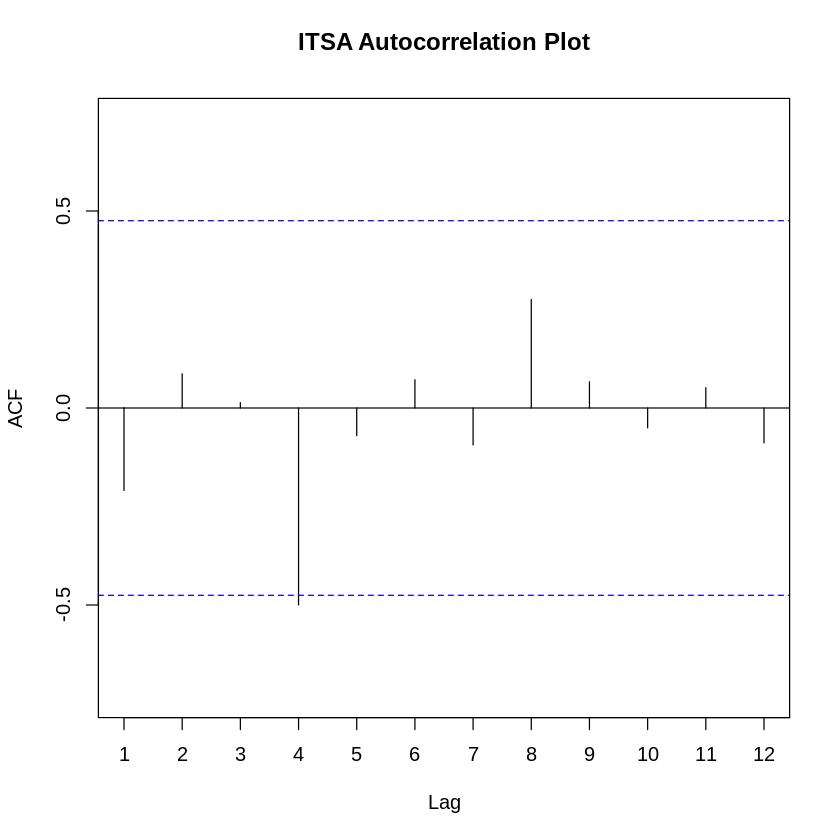

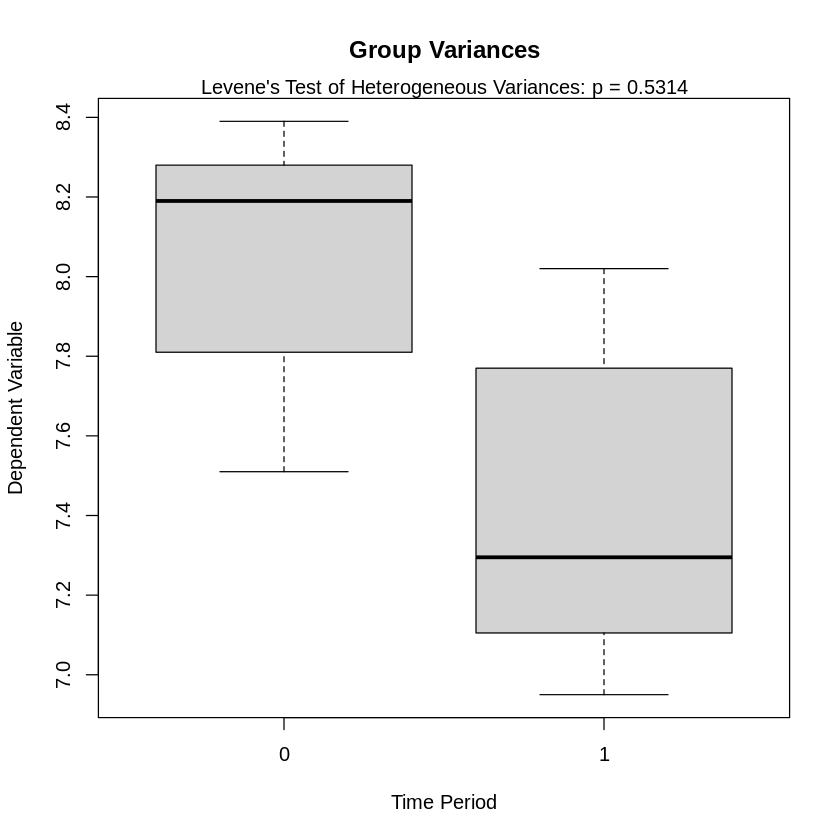

[[1]]
[1] "ITSA Post-Estimation"

$test_results
             Test P-value                              Result
1    Shapiro-Wilk  0.4442           Non-normality not present
2        Levene's  0.5314 Heterogeneous variances not present
3 Autocorrelation      NA         Autocorrelation not present

$bootstrap_plot

$residual_plot

$acf_plot

$variance_plot

$qqnorm_plot


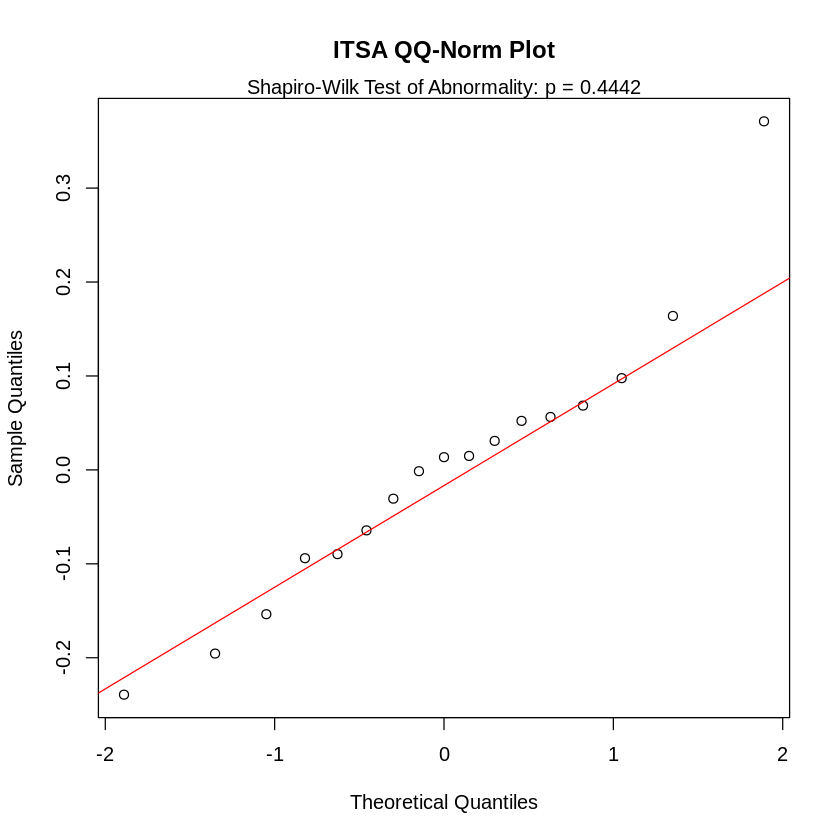

In [9]:
## Post-estimation Check

itsa.postest(model = mod1, bootstrap = TRUE)

Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)
interrupt_var 0.2936  1 11.6697 0.0046
cov1          0.0000  1  0.0015 0.9698
lag_depvar    1.4480  1 57.5505 <2e-16
Residuals     0.3271 13               
 
Bootstrapped F-values: 
 Lower CI Median F-value Upper CI
   2.4312         12.969   92.264

Result: Significant variation between time periods with chosen alpha (<0.1)


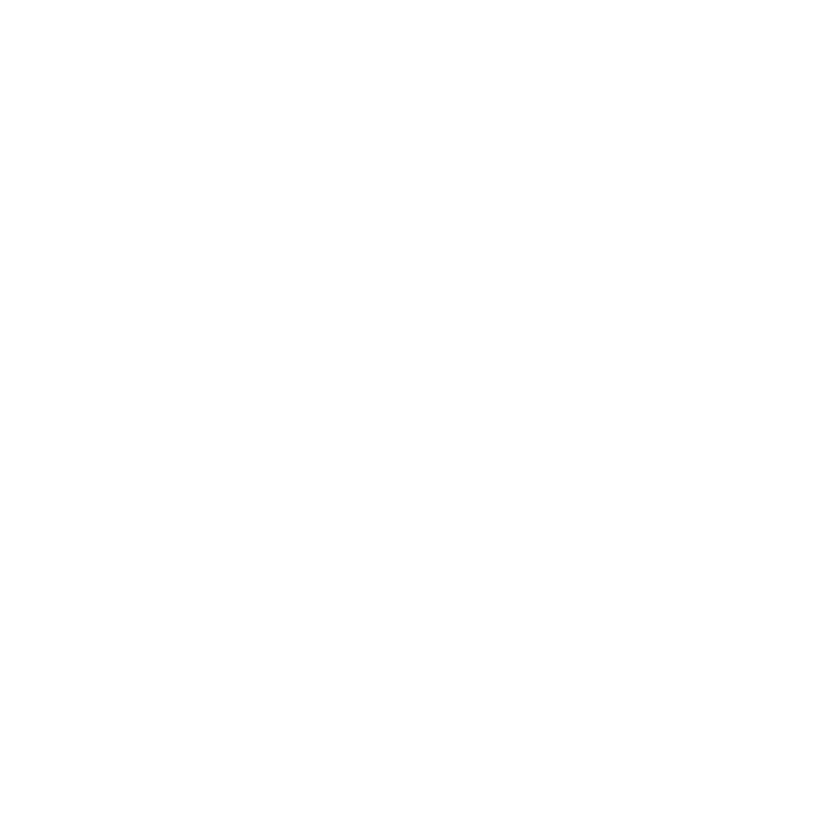

[[1]]
[1] "ITSA Model Fit"

$aov.result
Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)    
interrupt_var 0.2936  1 11.6697 0.0046 ** 
cov1          0.0000  1  0.0015 0.9698    
lag_depvar    1.4480  1 57.5505 <2e-16 ***
Residuals     0.3271 13                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$tukey.result
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = x$depvar ~ x$interrupt_var)

$`x$interrupt_var`
          diff        lwr        upr    p adj
1-0 -0.6340278 -0.9968813 -0.2711742 0.002035


$data
   depvar interrupt_var cov1 lag_depvar
2    8.19             0  3.3       8.22
3    8.23             0  5.1       8.19
4    8.28             0  5.2       8.23
5    8.32             0  5.4       8.28
6    8.39             0  4.5       8.32
7    8.02             1  4.7       8.39
8    7.92             1  4.9       8.02
9    7.62             1  5.3       7.92
10   7.

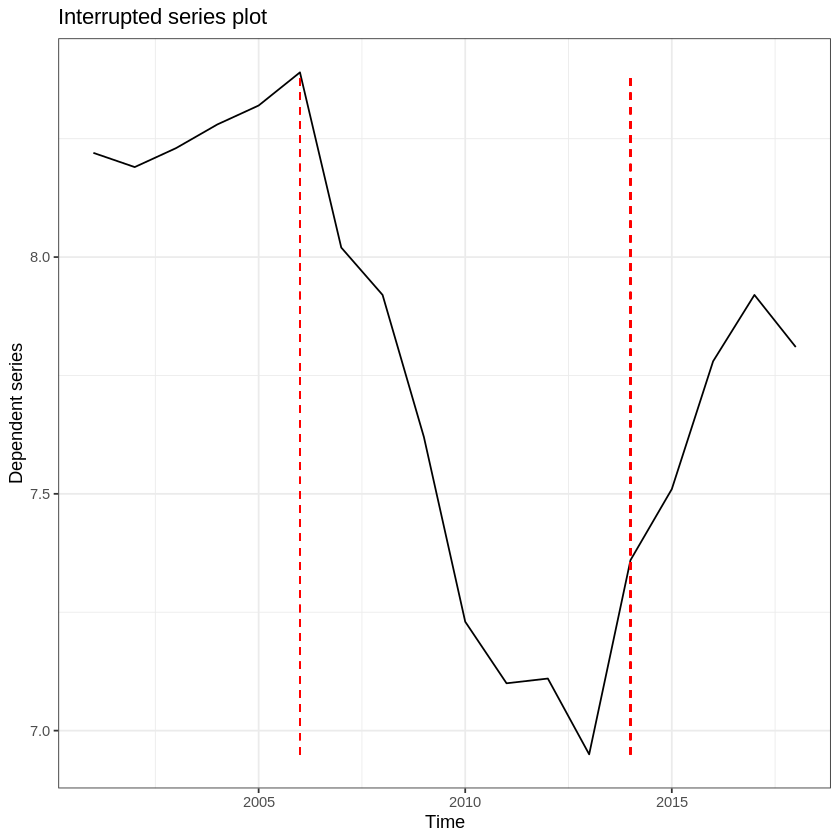

In [7]:
# Add a covariate, change alpha to 0.1
itsa.model(data=x, time="year", depvar="depv", interrupt_var = "interruption",
covariates = "cov1", alpha=0.1, bootstrap=TRUE, Reps = 250)

Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)
interrupt_var 0.4710  1  1.7965 0.2015
lag_depvar    1.0473  1  3.9947 0.0654
Residuals     3.6704 14               
 

Result: No significant variation between time periods with chosen alpha (<0.05)


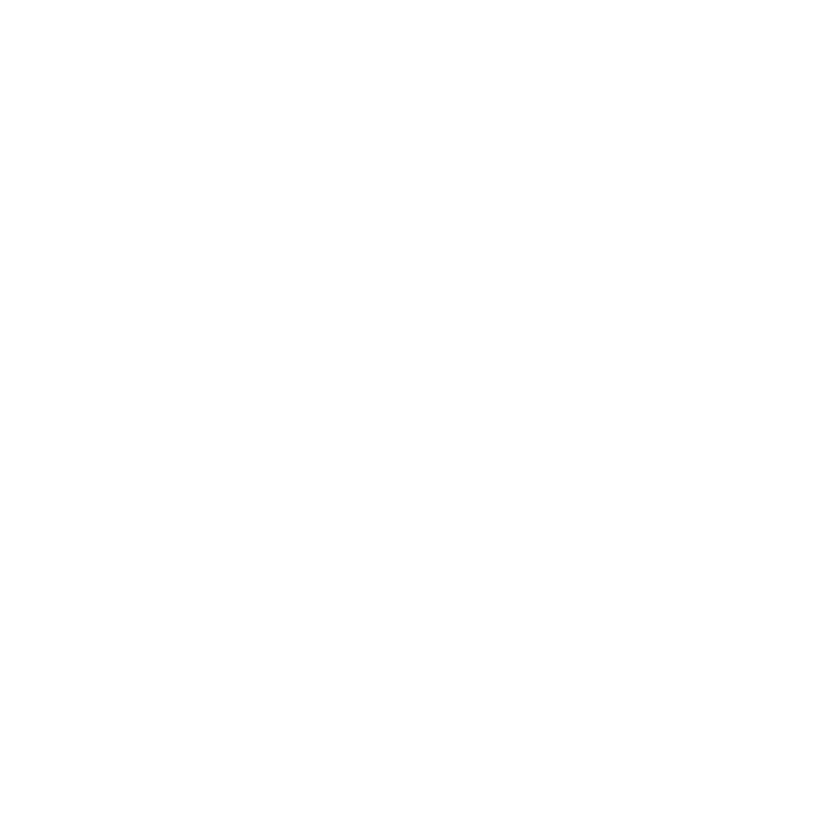

[[1]]
[1] "ITSA Model Fit"

$aov.result
Anova Table (Type II tests)

Response: depvar
              Sum Sq Df F value Pr(>F)  
interrupt_var 0.4710  1  1.7965 0.2015  
lag_depvar    1.0473  1  3.9947 0.0654 .
Residuals     3.6704 14                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$tukey.result
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: stats::aov(formula = x$depvar ~ x$interrupt_var)

$`x$interrupt_var`
         diff          lwr     upr     p adj
1-0 0.5763889 -0.004442367 1.15722 0.0515629


$data
   depvar interrupt_var lag_depvar
2     3.3             0        3.1
3     5.1             0        3.3
4     5.2             0        5.1
5     5.4             0        5.2
6     4.5             0        5.4
7     4.7             1        4.5
8     4.9             1        4.7
9     5.3             1        4.9
10    5.6             1        5.3
11    5.8             1        5.6
12    6.0             1        5.8


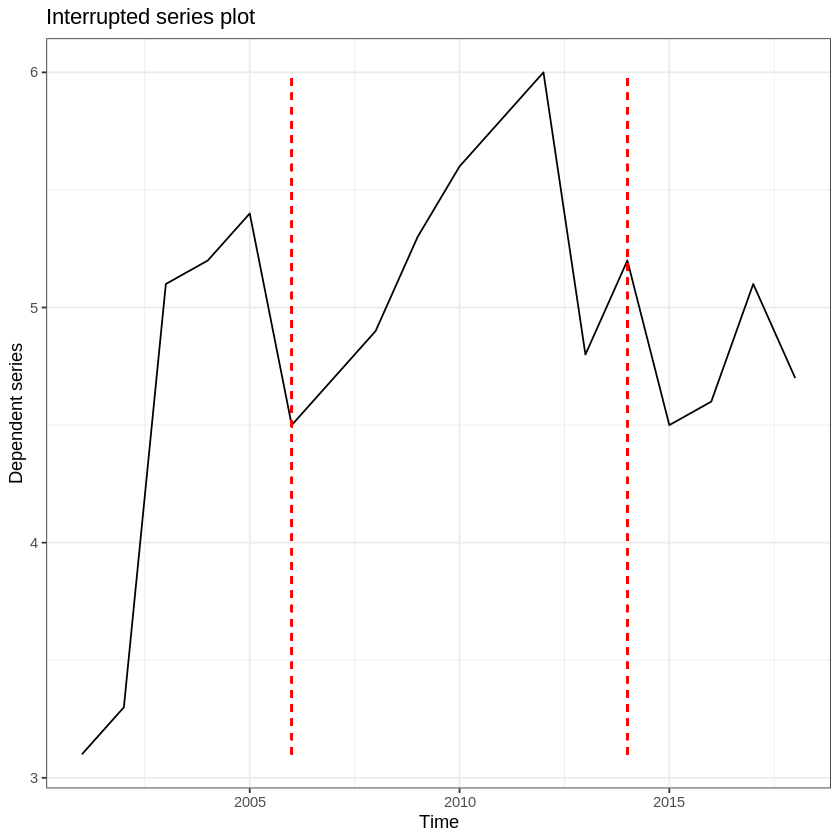

In [8]:
# Example of no significant result
itsa.model(data=x, time="year", depvar="cov1", interrupt_var = "interruption",
alpha=0.05, bootstrap=FALSE)

# References:

Chow, G. C. (1960). Tests of Equality Between Sets of Coefficients in Two Linear Regressions. Econometrica, 28(3), 591–605. https://doi.org/10.2307/1910133

(TSAAR): Cryer JD & Chan K-S (2008). Time Series Analysis With Applications in R, Second Edition. Springer Science+Business Media, LLC.

(ITSARP): English, Patrick, The its.analysis R Package – Modelling Short Time Series Data (June 6, 2019). Available at SSRN: https://ssrn.com/abstract=3398189 or http://dx.doi.org/10.2139/ssrn.3398189

(FPP2): Hyndman RJ, & Athanasopoulos G (2018) Forecasting: principles and practice, 2nd edition, Melbourne, Australia: OTexts. OTexts.com/fpp2. Accessed on 26 July 2019.

Hyndman, R. J., & Khandakar, Y. (2008). Automatic Time Series Forecasting: The forecast Package for R. Journal of Statistical Software, 27(3), 1–22. https://doi.org/10.18637/jss.v027.i03

(ITSASP): McDowall D, McCleary R, Meidinger EE, & Hay RA Jr (1980). Interrupted Time Series Analysis. SAGE PUBLICATIONS.

(ITSAOUP): McDowall D, McCleary R, & Bartos BJ (2019). Interrupted Time Series Analysis. Oxford University Press.
